# Datojen haku ja esikäsittely

In [1]:
from set_path import set_path
mainpath, path = set_path('areadata')

In [2]:
from read_and_prepare_data import read_and_prepare_data
stat, post, kunta_stat, vaalidata = read_and_prepare_data(path)

read_and_prepare_data  read from file
read_post_muncipalities  read from file


In [3]:
from selected_cols import selected_cols
numeric_features, categorical_features = selected_cols(largeset=False, parties=False)

In [4]:
from sklearn.feature_selection import  mutual_info_classif
import pandas as pd

from draw_and_create_clusters import create_kmeans_clusters 

from prepare_and_scale_data import prepare_and_scale_data
from create_prediction import select_kbest
from select_columns_and_clean_data import select_columns_and_clean_data

from draw_and_create_clusters import draw_pca, drawTSNE,  display_scree_plot, display_circles, display_parallel_coordinates_centroids, display_factorial_planes
from delete_outliers import delete_outliers

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Load the TensorBoard notebook extension
%load_ext tensorboard

pd.options.display.max_colwidth = 100


selected = stat.copy()
selected_vaalidata = vaalidata.copy()
post_included = post.copy()

selected = stat[(stat['muncipality_code']==49)].copy()
selected_vaalidata = vaalidata[(vaalidata['Kuntanumero']==49)].copy()
post_included = post[post['muncipality_code']==49]['postcode'].copy()


selected = stat[(stat['muncipality_code']==91)].copy()
selected_vaalidata = vaalidata[(vaalidata['Kuntanumero']==91)].copy()
post_included = post[post['muncipality_code']==91]['postcode'].copy()

selected = stat[stat['area_code']=='FI1B1'].copy()
selected_vaalidata = vaalidata[vaalidata['area_code']=='FI1B1'].copy()
post_included = post[post['area_code']=='FI1B1'].copy()


selected = stat.copy()
selected_vaalidata = vaalidata.copy()
post_included = post.copy()





In [5]:
from create_target_columns import create_target_columns
from create_neuro_prediction import create_neuro_prediction
list_of_parties = ['VIHR', 'KOK', 'SDP', 'KD', 'KESK', 'RKP', 'PS', 'VAS']

target_col_start = 'Äänet yhteensä lkm'
target = create_target_columns(list_of_parties, target_col_start)


In [6]:
import xgboost as xgb
from sklearn.feature_selection import mutual_info_regression
from create_prediction import create_prediction


#set values to feature engineering attributes

#Check
#k_selected need to have correct values, if they are too large, evrything needs to be started again
k_selected = 'all'
test_size = 0.3
#Scalers attributes
kbest_score_func = mutual_info_regression 

metric = 'rmse'
Skfold=False
Verbose = False
testing=True
scaled = False



In [7]:
from prepare_and_scale_data import prepare_and_scale_data
from draw_all import draw_true_vs_predicted
import matplotlib.pyplot as plt
from shap_Xboost import shap_Xboost
from shap_proba_individual import shap_proba_individual, print_individual, print_reason, print_individual_waterfall
from shap_vals import shap_vals
from print_examples import print_examples
import shap

shap_values = {}
mymodel = {}
explainer = {}
shap_interaction_values = {}
shap_expected_value = {}
features_dict = {}
importance_dict = {}

data, X_scale, X = prepare_and_scale_data(selected, pd.DataFrame(), numeric_features=numeric_features, categorical_features=categorical_features)

i = 0
for t in target:
    params = {
        #Initial xgboost parameters to be automatically tuned
        'objective':'reg:squarederror',
        'booster' : 'gbtree',
        'eval_metric' : metric
        }
    d = pd.DataFrame()
    test = pd.DataFrame()
    filename_model = 'xgboost_political' + t
    print(t)
    d, test, features_df, importance_df, model, params, y_pred, X_train, y_train, X_test, y_test = create_prediction(filename_model,
                          path,
                          selected,
                          selected,
                          t,
                          kbest_score_func=kbest_score_func,
                          metric=metric,
                          params= params,
                          numeric_features=numeric_features,
                          categorical_features=categorical_features,
                          scaled=scaled,
                          k_selected = k_selected,
                          test_size = test_size,
                          Skfold=Skfold,
                          Verbose = Verbose,
                          testing=testing)
    
    
    data.loc[:,"Ennustettu "+ t] = y_pred
    
    filename_model = 'xgboost_political_shap' + t
    mymod, expl, sh_values, shap_i_values, shap_e_value = shap_Xboost(filename_model, path, data, t, params, X)

    shap_values[t] = sh_values
    mymodel[t] = mymod
    explainer[t] = expl
    shap_interaction_values[t] = shap_i_values
    shap_expected_value[t] = shap_e_value
    features_dict[t] = features_df
    importance_dict[t] = importance_df



Äänet yhteensä lkm VIHR
Create model
[0]	train-rmse:237.82603	test-rmse:275.24603
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
Stopping. Best iteration:
[40]	train-rmse:8.30351	test-rmse:174.76721

testing
Start with xgb.cv params: rmse: 145.63123066666665
Best xgb.cv params: max_depth 6, min_child_weight 4, rmse: 141.99220033333333
Best xgb.cv params: gamma 0.0, rmse: 141.99220033333333
Best xgb.cv params: lambda 1.0, alpha 0.0, rmse: 141.99220033333333
Best xgb.cv params: colsample_bytree 1.0, subsample 1.0, rmse: 141.99220033333333
Best xgb.cv params: eta 0.2, rmse: 141.71616066666667
Best xgb.cv params: scale_pos_weight 0.2, rmse: 137.52731833333334
Found hyperparameters with 1 rounds 
{'objective': 'reg:squarederror', 'booster': 'gbtree', 'eval_metric': 'rmse', 'max_depth': 6, 'min_child_weight': 4, 'gamma': 0.0, 'lambda': 1.0, 'alpha': 0.0, 'colsample_bytree': 1.0, 'subsample': 1.0, 

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Äänet yhteensä lkm KOK
Create model
[0]	train-rmse:331.52356	test-rmse:270.38434
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
Stopping. Best iteration:
[5]	train-rmse:114.41852	test-rmse:168.33714

testing
Start with xgb.cv params: rmse: 208.4196116666667
Best xgb.cv params: max_depth 6, min_child_weight 1, rmse: 208.4196116666667
Best xgb.cv params: gamma 1.4, rmse: 208.15975433333332
Best xgb.cv params: lambda 1.0, alpha 0.8, rmse: 207.19515466666667
Best xgb.cv params: colsample_bytree 0.4, subsample 1.0, rmse: 205.6469983333333
Best xgb.cv params: eta 0.2, rmse: 204.826111
Best xgb.cv params: scale_pos_weight 0.4, rmse: 203.189972
Found hyperparameters with 1 rounds 
{'objective': 'reg:squarederror', 'booster': 'gbtree', 'eval_metric': 'rmse', 'max_depth': 6, 'min_child_weight': 1, 'gamma': 1.4, 'lambda': 1.0, 'alpha': 0.8, 'colsample_bytree': 0.4, 'subsample': 1.0, 'eta': 0.2, 'scale_

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Äänet yhteensä lkm SDP
Create model
[0]	train-rmse:292.32550	test-rmse:278.87085
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
Stopping. Best iteration:
[13]	train-rmse:49.89099	test-rmse:158.05907

testing
Start with xgb.cv params: rmse: 185.33508300000003
Best xgb.cv params: max_depth 3, min_child_weight 1, rmse: 177.02216599999997
Best xgb.cv params: gamma 0.0, rmse: 177.02216599999997
Best xgb.cv params: lambda 1.0, alpha 0.4, rmse: 176.74868233333336
Best xgb.cv params: colsample_bytree 0.8, subsample 1.0, rmse: 176.352
Best xgb.cv params: eta 0.2, rmse: 181.57685866666668
Best xgb.cv params: scale_pos_weight 0.4, rmse: 180.57519000000002
Found hyperparameters with 1 rounds 
{'objective': 'reg:squarederror', 'booster': 'gbtree', 'eval_metric': 'rmse', 'max_depth': 3, 'min_child_weight': 1, 'gamma': 0.0, 'lambda': 1.0, 'alpha': 0.4, 'colsample_bytree': 0.8, 'subsample': 1.0, 'eta': 0.2,

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Äänet yhteensä lkm KD
Create model
[0]	train-rmse:69.84727	test-rmse:62.19843
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
Stopping. Best iteration:
[15]	train-rmse:13.95279	test-rmse:47.40138

testing
Start with xgb.cv params: rmse: 55.320743666666665
Best xgb.cv params: max_depth 5, min_child_weight 4, rmse: 53.37866966666667
Best xgb.cv params: gamma 0.0, rmse: 53.37866966666667
Best xgb.cv params: lambda 1.0, alpha 0.0, rmse: 53.37866966666667
Best xgb.cv params: colsample_bytree 1.0, subsample 1.0, rmse: 53.37866966666667
Best xgb.cv params: eta 0.2, rmse: 54.184667
Best xgb.cv params: scale_pos_weight 0.2, rmse: 53.60279566666666
Found hyperparameters with 1 rounds 
{'objective': 'reg:squarederror', 'booster': 'gbtree', 'eval_metric': 'rmse', 'max_depth': 5, 'min_child_weight': 4, 'gamma': 0.0, 'lambda': 1.0, 'alpha': 0.0, 'colsample_bytree': 1.0, 'subsample': 1.0, 'eta': 0.2, 'scale

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Äänet yhteensä lkm KESK
Create model
[0]	train-rmse:192.95331	test-rmse:210.54201
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
Stopping. Best iteration:
[21]	train-rmse:24.57142	test-rmse:139.40337

testing
Start with xgb.cv params: rmse: 125.61238099999998
Best xgb.cv params: max_depth 5, min_child_weight 1, rmse: 121.7724
Best xgb.cv params: gamma 0.0, rmse: 121.7724
Best xgb.cv params: lambda 1.0, alpha 0.4, rmse: 121.714638
Best xgb.cv params: colsample_bytree 1.0, subsample 1.0, rmse: 121.714638
Best xgb.cv params: eta 0.2, rmse: 124.54602033333333
Best xgb.cv params: scale_pos_weight 0.8, rmse: 121.37900033333334
Found hyperparameters with 1 rounds 
{'objective': 'reg:squarederror', 'booster': 'gbtree', 'eval_metric': 'rmse', 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.0, 'lambda': 1.0, 'alpha': 0.4, 'colsample_bytree': 1.0, 'subsample': 1.0, 'eta': 0.2, 'scale_pos_weight': 0.8

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Äänet yhteensä lkm RKP
Create model
[0]	train-rmse:171.71104	test-rmse:102.33630
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
Stopping. Best iteration:
[3]	train-rmse:88.33633	test-rmse:91.29364

testing
Start with xgb.cv params: rmse: 166.57209266666666
Best xgb.cv params: max_depth 6, min_child_weight 4, rmse: 164.12689733333332
Best xgb.cv params: gamma 1.8, rmse: 164.12256366666665
Best xgb.cv params: lambda 1.0, alpha 0.4, rmse: 163.17001333333334
Best xgb.cv params: colsample_bytree 0.4, subsample 1.0, rmse: 160.01748666666666
Best xgb.cv params: eta 0.2, rmse: 155.01250700000003
Best xgb.cv params: scale_pos_weight 0.0, rmse: 153.71824666666666
Found hyperparameters with 1 rounds 
{'objective': 'reg:squarederror', 'booster': 'gbtree', 'eval_metric': 'rmse', 'max_depth': 6, 'min_child_weight': 4, 'gamma': 1.8, 'lambda': 1.0, 'alpha': 0.4, 'colsample_bytree': 0.4, 'subsample': 1.0, 'e

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Äänet yhteensä lkm PS
Create model
[0]	train-rmse:252.79129	test-rmse:243.96468
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
Stopping. Best iteration:
[76]	train-rmse:5.05809	test-rmse:133.32153

testing
Start with xgb.cv params: rmse: 148.92626466666667
Best xgb.cv params: max_depth 3, min_child_weight 4, rmse: 141.70610533333334
Best xgb.cv params: gamma 0.0, rmse: 141.70610533333334
Best xgb.cv params: lambda 1.0, alpha 0.0, rmse: 141.70610533333334
Best xgb.cv params: colsample_bytree 1.0, subsample 1.0, rmse: 141.70610533333334
Best xgb.cv params: eta 0.2, rmse: 141.373637
Best xgb.cv params: scale_pos_weight 0.6, rmse: 139.64367166666665
Found hyperparameters with 1 rounds 
{'objective': 'reg:squarederror', 'booster': 'gbtree', 'eval_metric': 'rmse', 'max_depth': 3, 'min_child_weight': 4, 'gamma': 0.0, 'lambda': 1.0, 'alpha': 0.0, 'colsample_bytree': 1.0, 'subsample': 1.0, 'eta': 0.2

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Äänet yhteensä lkm VAS
Create model
[0]	train-rmse:160.45369	test-rmse:161.93565
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
Stopping. Best iteration:
[51]	train-rmse:6.42531	test-rmse:117.03714

testing
Start with xgb.cv params: rmse: 129.5504073333333
Best xgb.cv params: max_depth 5, min_child_weight 1, rmse: 126.92852799999999
Best xgb.cv params: gamma 0.0, rmse: 126.92852799999999
Best xgb.cv params: lambda 1.0, alpha 0.0, rmse: 126.92852799999999
Best xgb.cv params: colsample_bytree 1.0, subsample 1.0, rmse: 126.92852799999999
Best xgb.cv params: eta 0.4, rmse: 127.04069533333335
Best xgb.cv params: scale_pos_weight 0.6, rmse: 126.90600066666667
Found hyperparameters with 1 rounds 
{'objective': 'reg:squarederror', 'booster': 'gbtree', 'eval_metric': 'rmse', 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.0, 'lambda': 1.0, 'alpha': 0.0, 'colsample_bytree': 1.0, 'subsample': 1.0, 'e

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


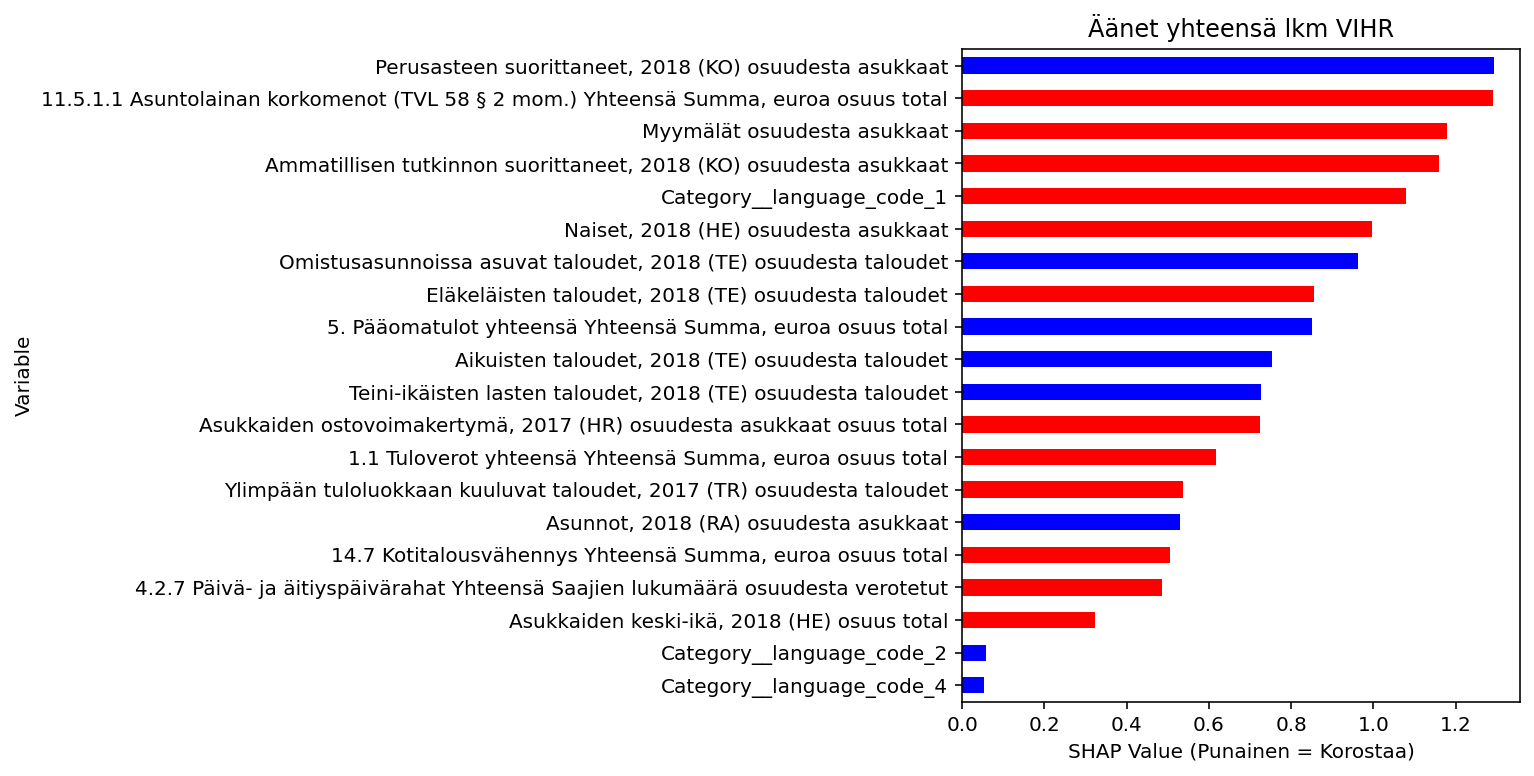

In [8]:
key = target[0]
vals = shap_vals(X, key, shap_values[key])

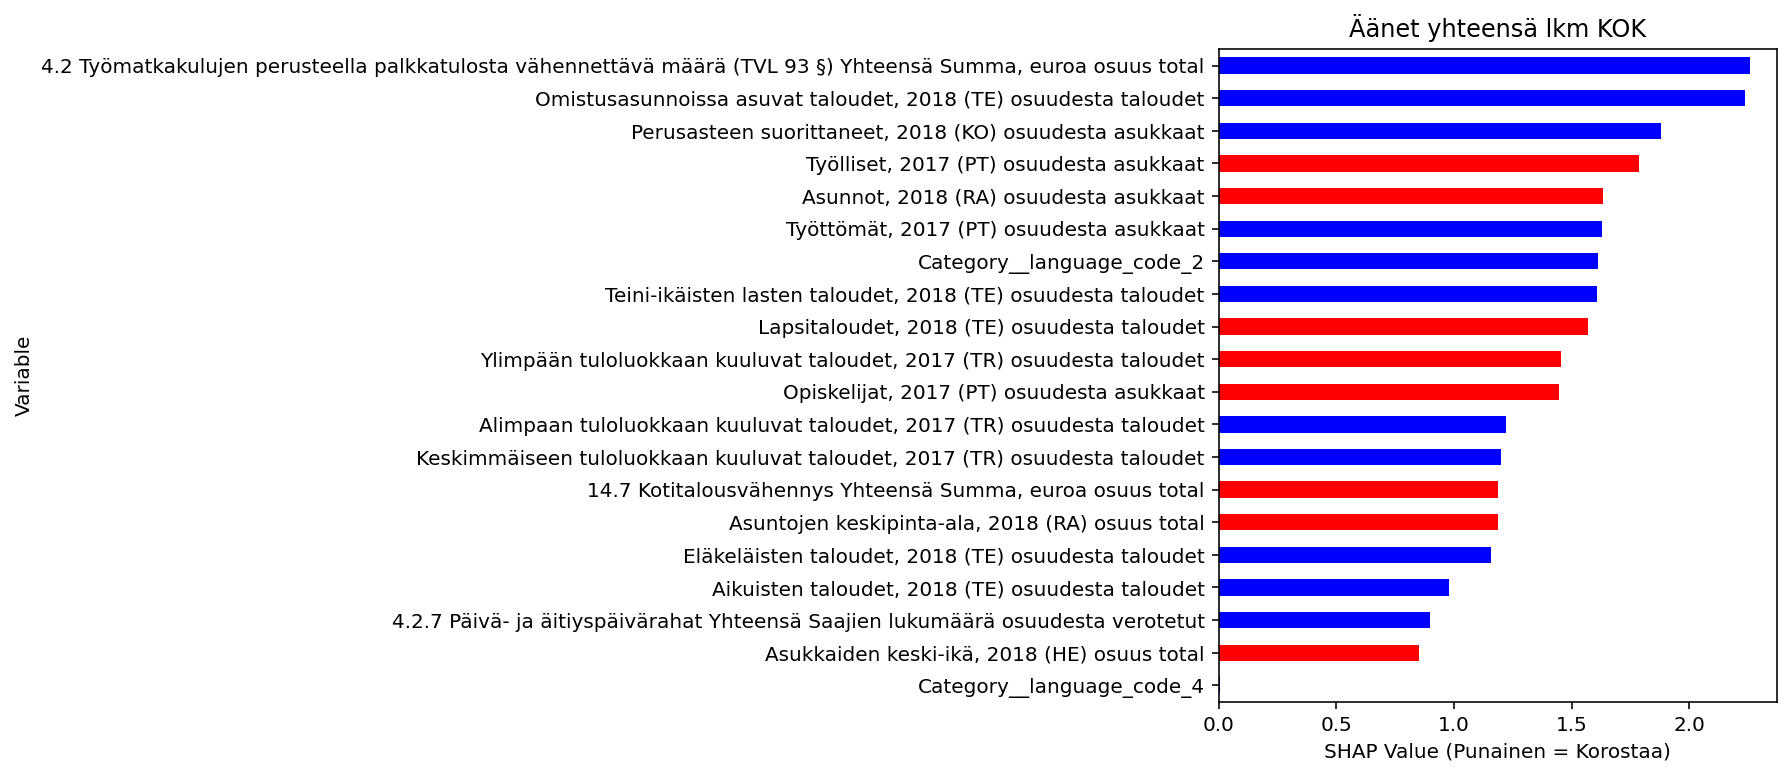

In [9]:
key = target[1]
vals = shap_vals(X, key, shap_values[key])

invalid value encountered in true_divide
invalid value encountered in true_divide


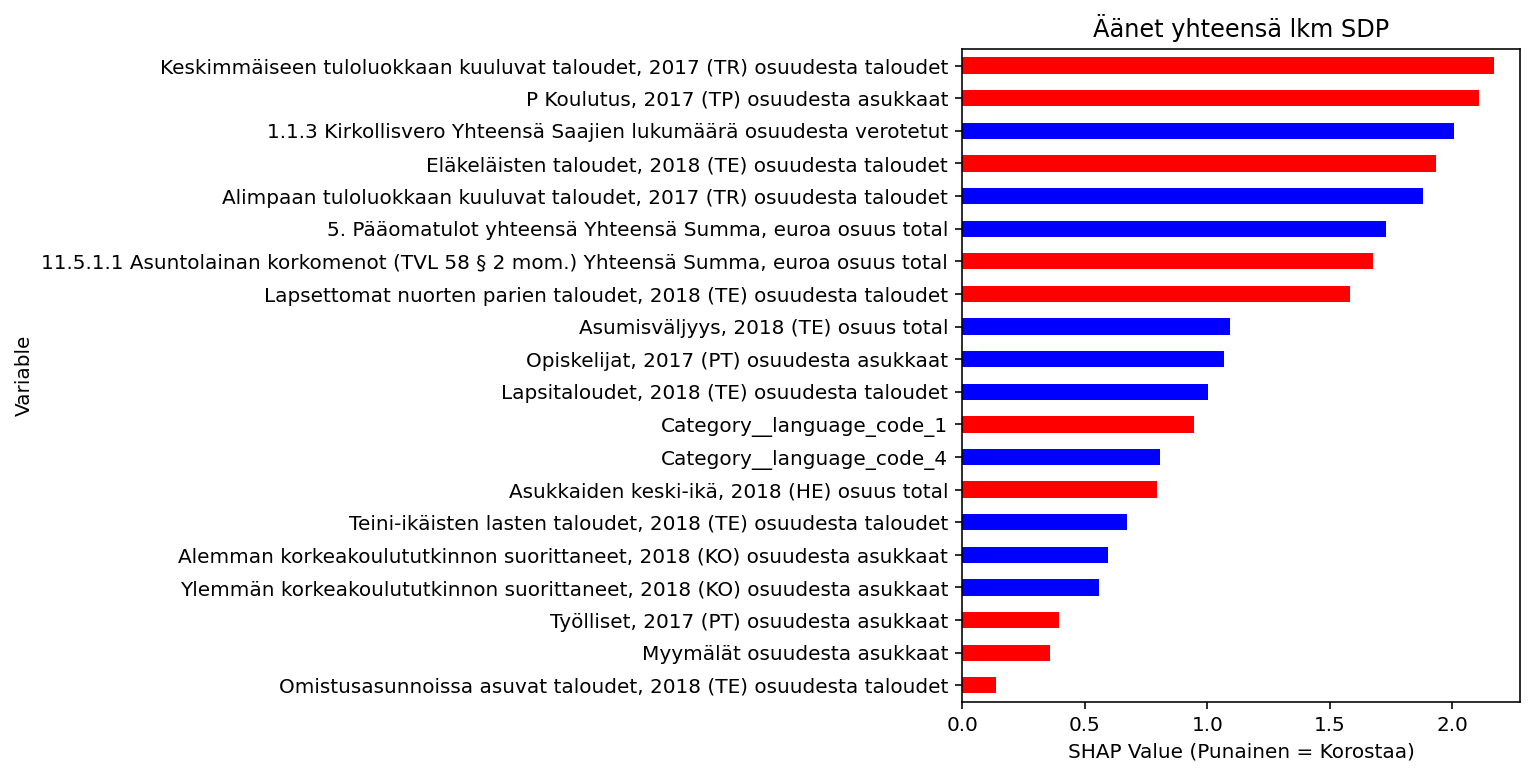

In [10]:
key = target[2]
vals = shap_vals(X, key, shap_values[key])

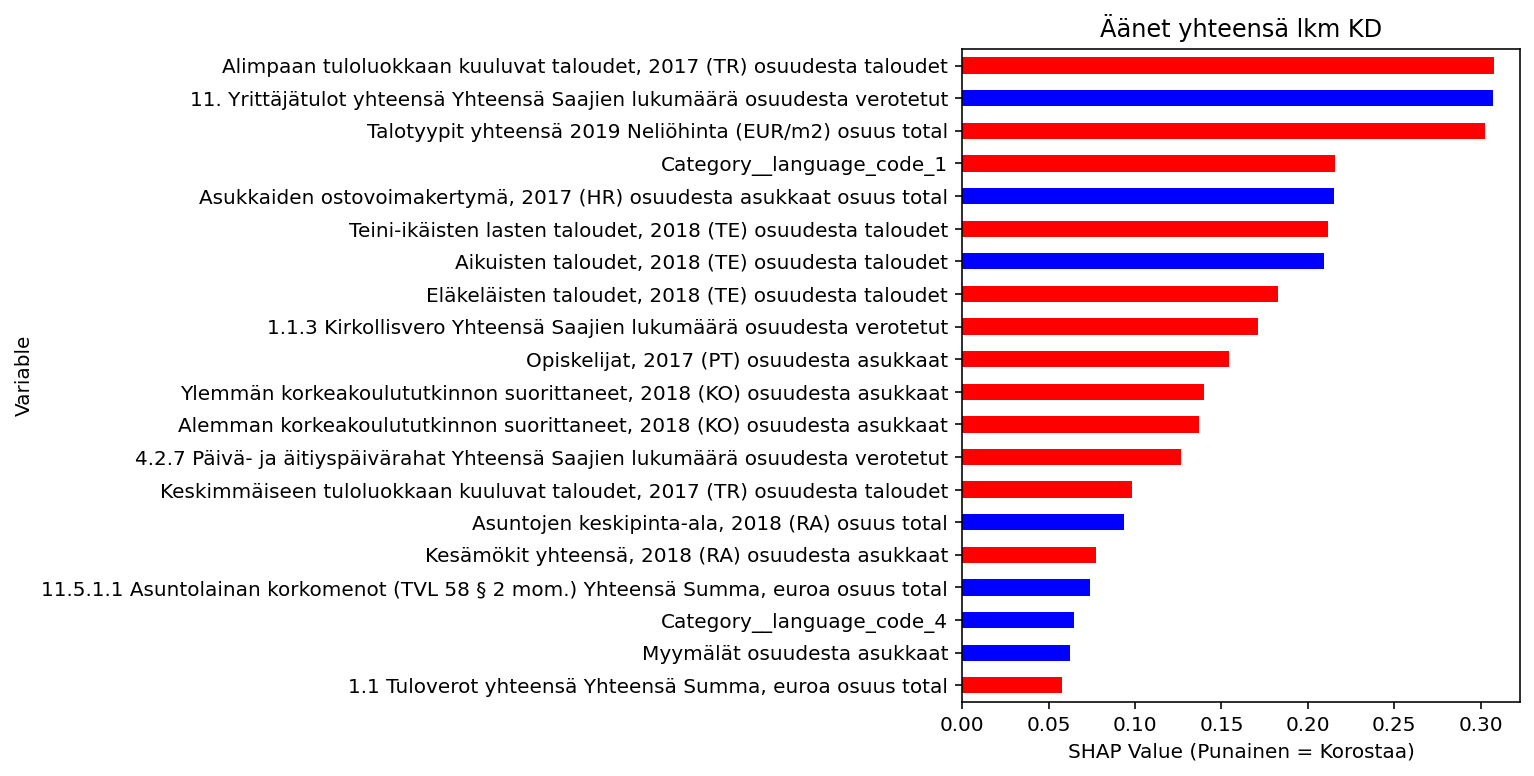

In [11]:
key = target[3]
vals = shap_vals(X, key, shap_values[key])

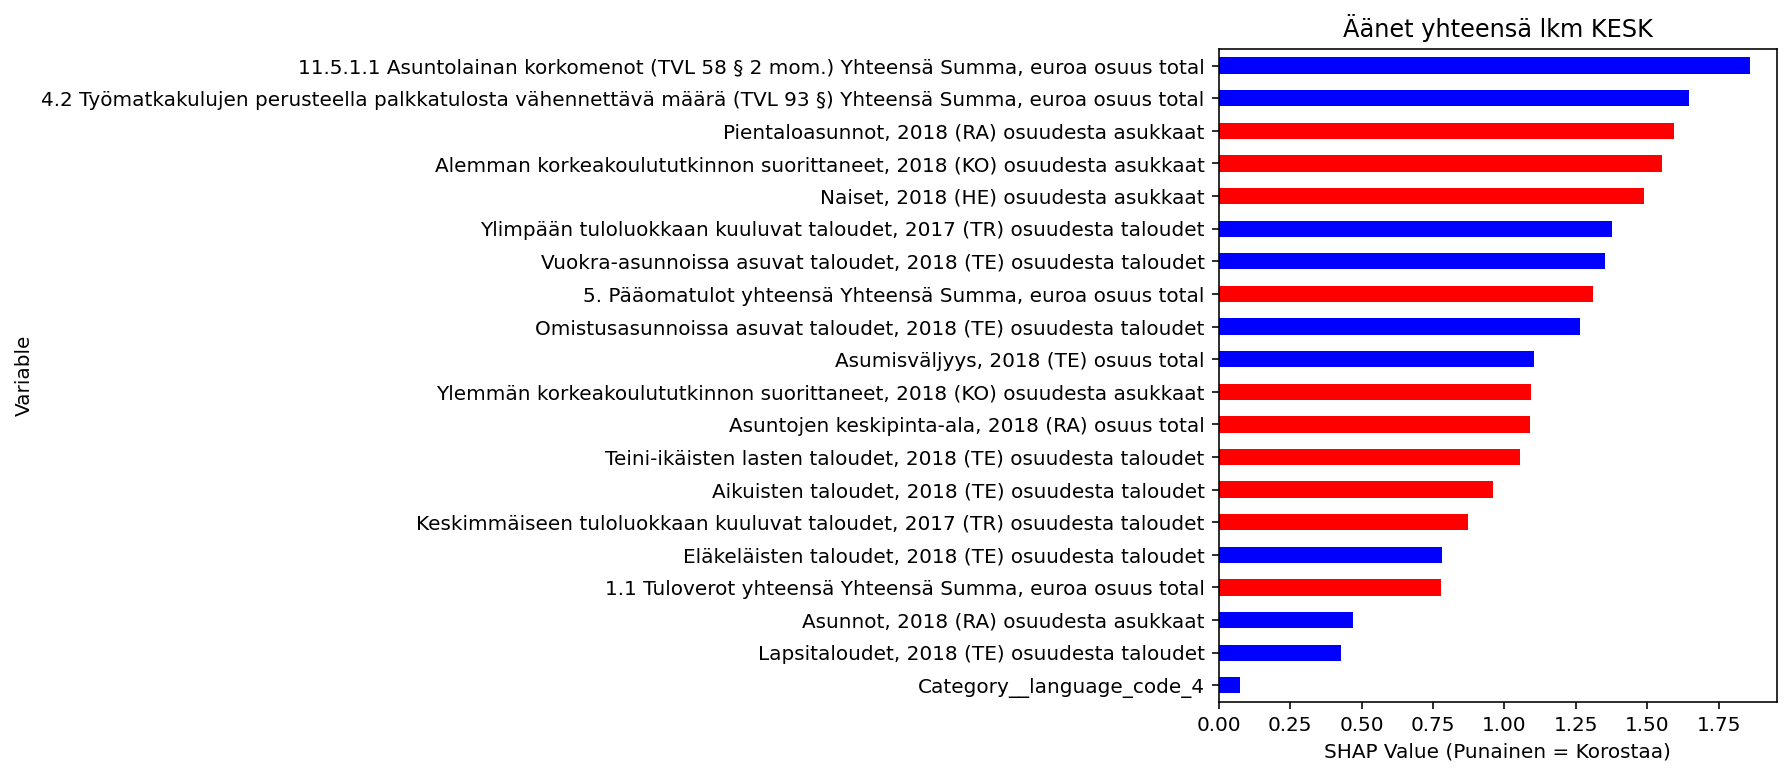

In [12]:
key = target[4]
vals = shap_vals(X, key, shap_values[key])

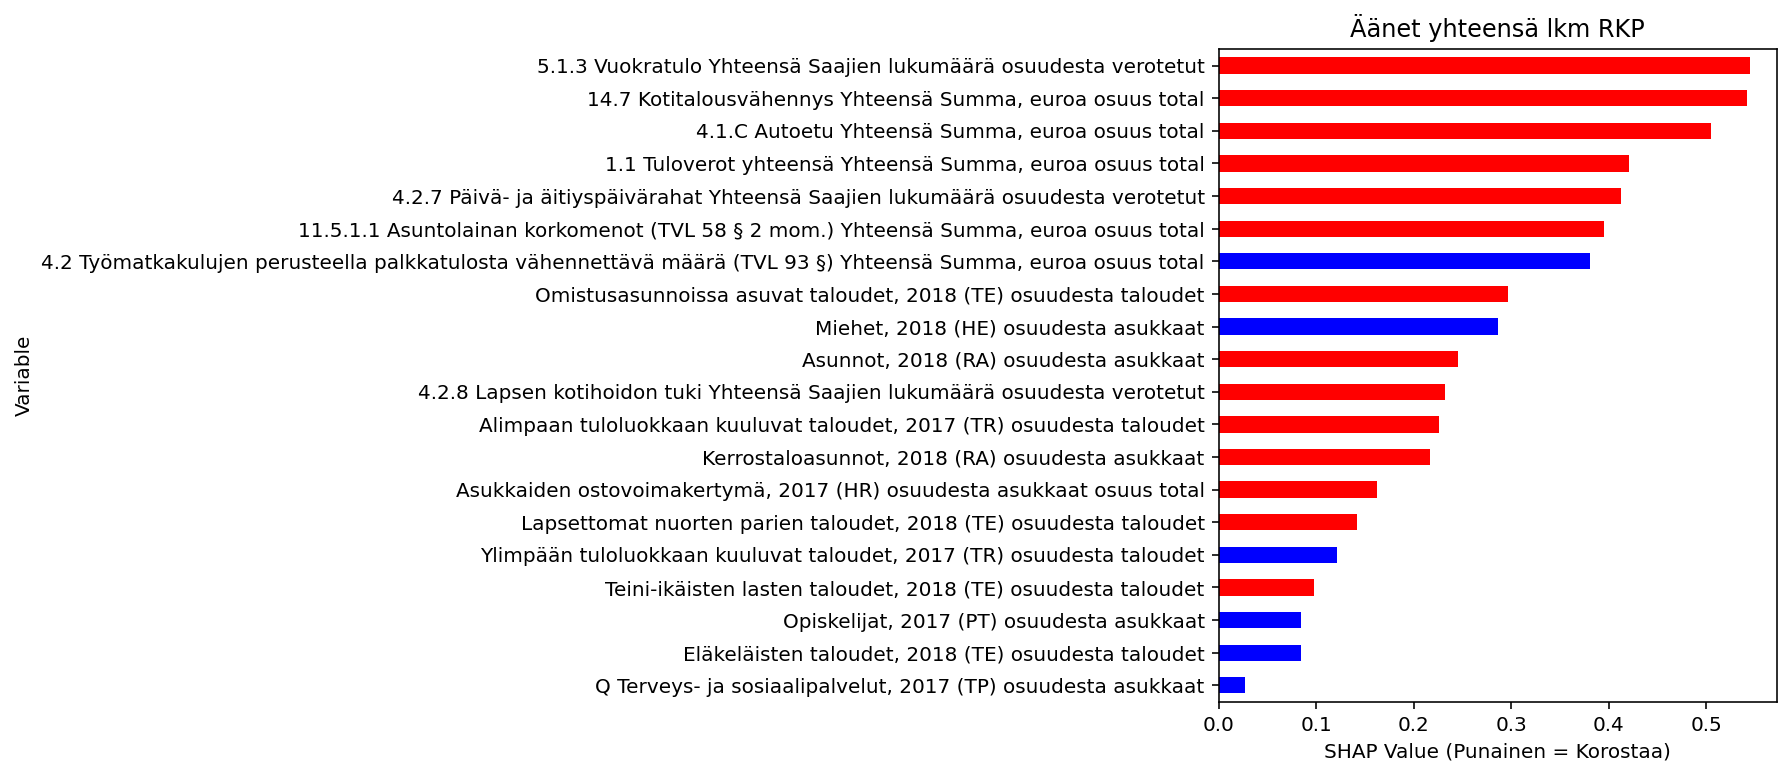

In [13]:
key = target[5]
vals = shap_vals(X, key, shap_values[key])

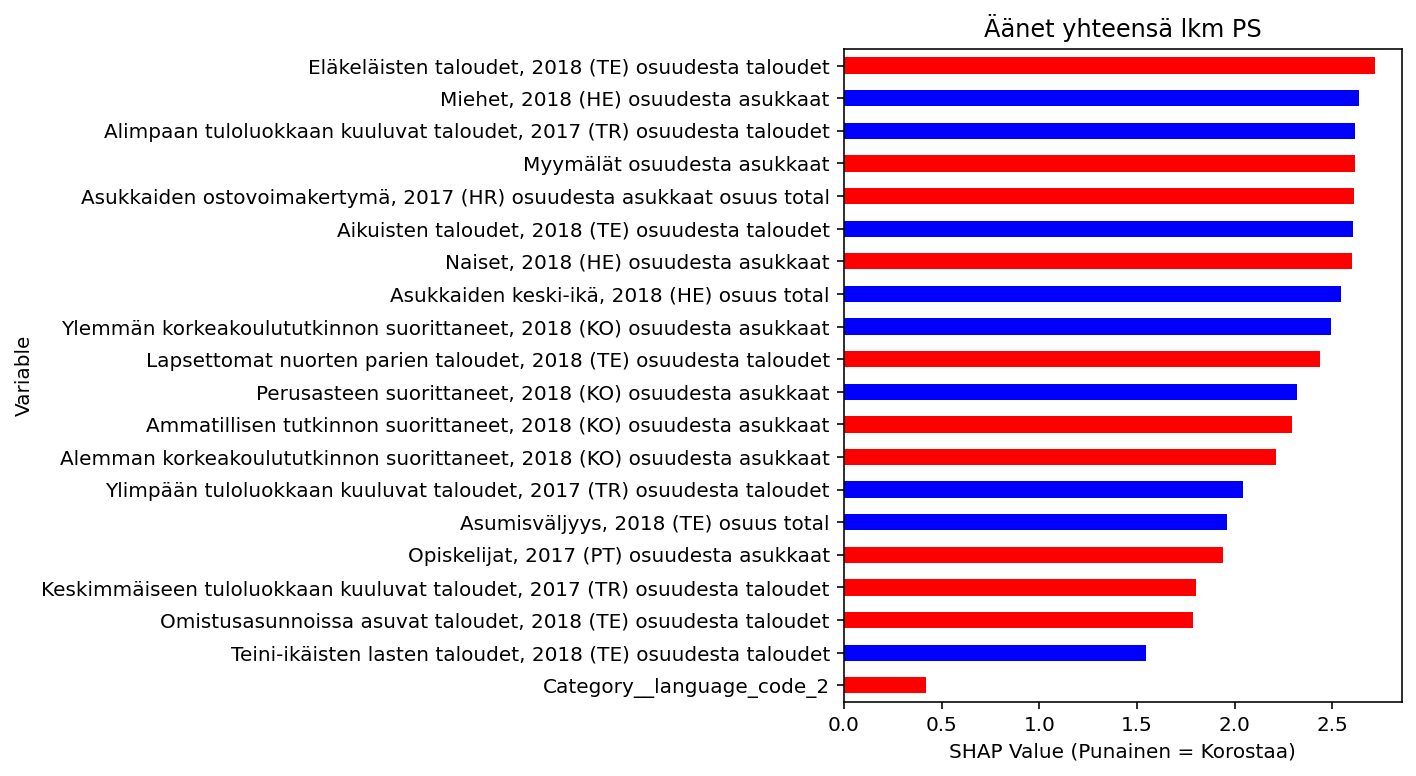

In [14]:
key = target[6]
vals = shap_vals(X, key, shap_values[key])

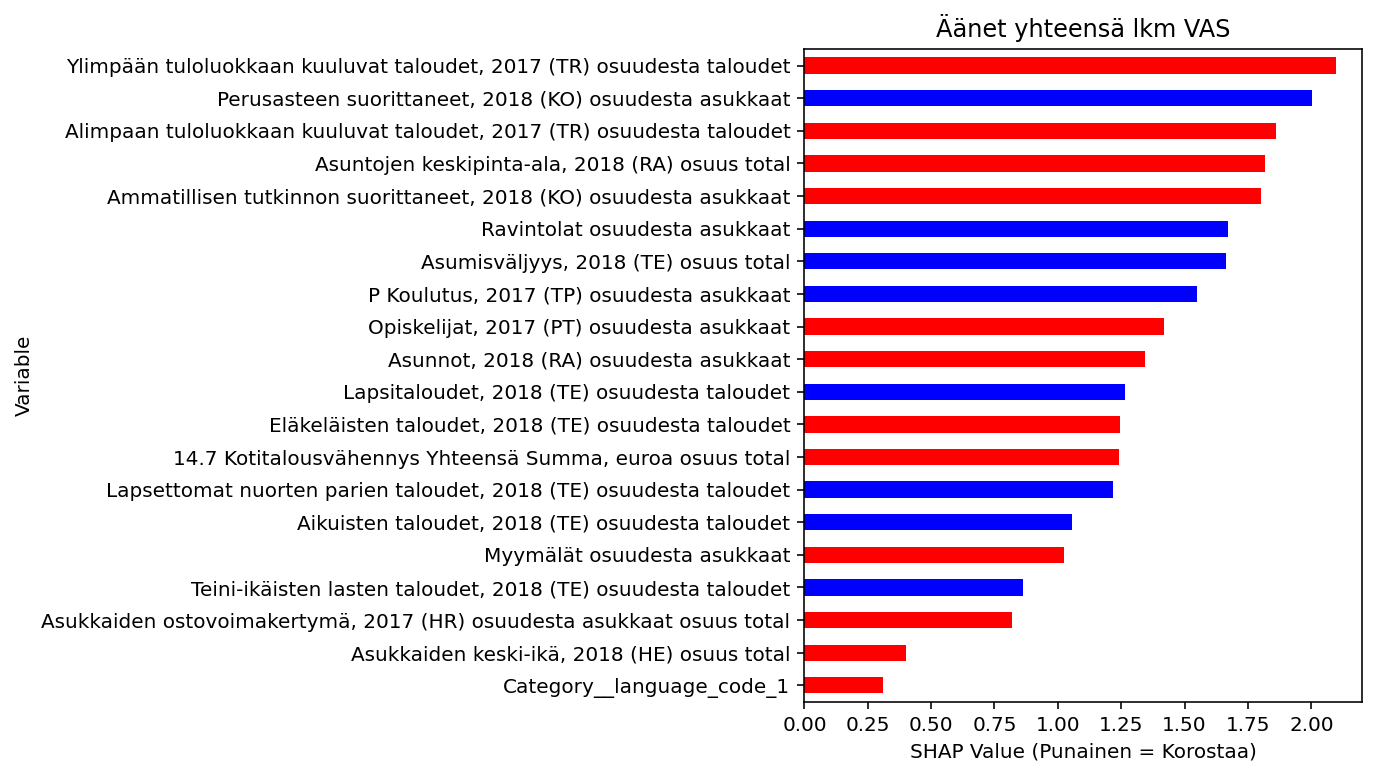

In [15]:
key = target[7]
vals = shap_vals(X, key, shap_values[key])

In [16]:
from show_election_result import show_election_result
show_election_result(data, selected_vaalidata, target_col_start, list_of_parties)

VIHR  lasketut äänet: Aitotulos  354152 Laskennallinen  344923 Ennuste  354301
Laskennallisen virhe aitoon tulokseen 2.606 %
Ennusteen virhe aitoon tulokseen -0.042 %
Ennusteen virhe laskennalliseen tulokseen -2.719 %

KOK  lasketut äänet: Aitotulos  523924 Laskennallinen  514725 Ennuste  521509
Laskennallisen virhe aitoon tulokseen 1.756 %
Ennusteen virhe aitoon tulokseen 0.461 %
Ennusteen virhe laskennalliseen tulokseen -1.318 %

SDP  lasketut äänet: Aitotulos  546263 Laskennallinen  538933 Ennuste  540099
Laskennallisen virhe aitoon tulokseen 1.342 %
Ennusteen virhe aitoon tulokseen 1.128 %
Ennusteen virhe laskennalliseen tulokseen -0.216 %

KD  lasketut äänet: Aitotulos  120019 Laskennallinen  117317 Ennuste  116186
Laskennallisen virhe aitoon tulokseen 2.251 %
Ennusteen virhe aitoon tulokseen 3.194 %
Ennusteen virhe laskennalliseen tulokseen 0.964 %

KESK  lasketut äänet: Aitotulos  423511 Laskennallinen  415357 Ennuste  413650
Laskennallisen virhe aitoon tulokseen 1.925 %
Ennuste

In [17]:
pnro = '00100'
id_col = 'Postinumero'
party ='KOK'
target = 'Äänet yhteensä lkm ' + party
df, X_rand, clst = shap_proba_individual(explainer[key], mymodel[key], data, target, X, id_col, pnro)

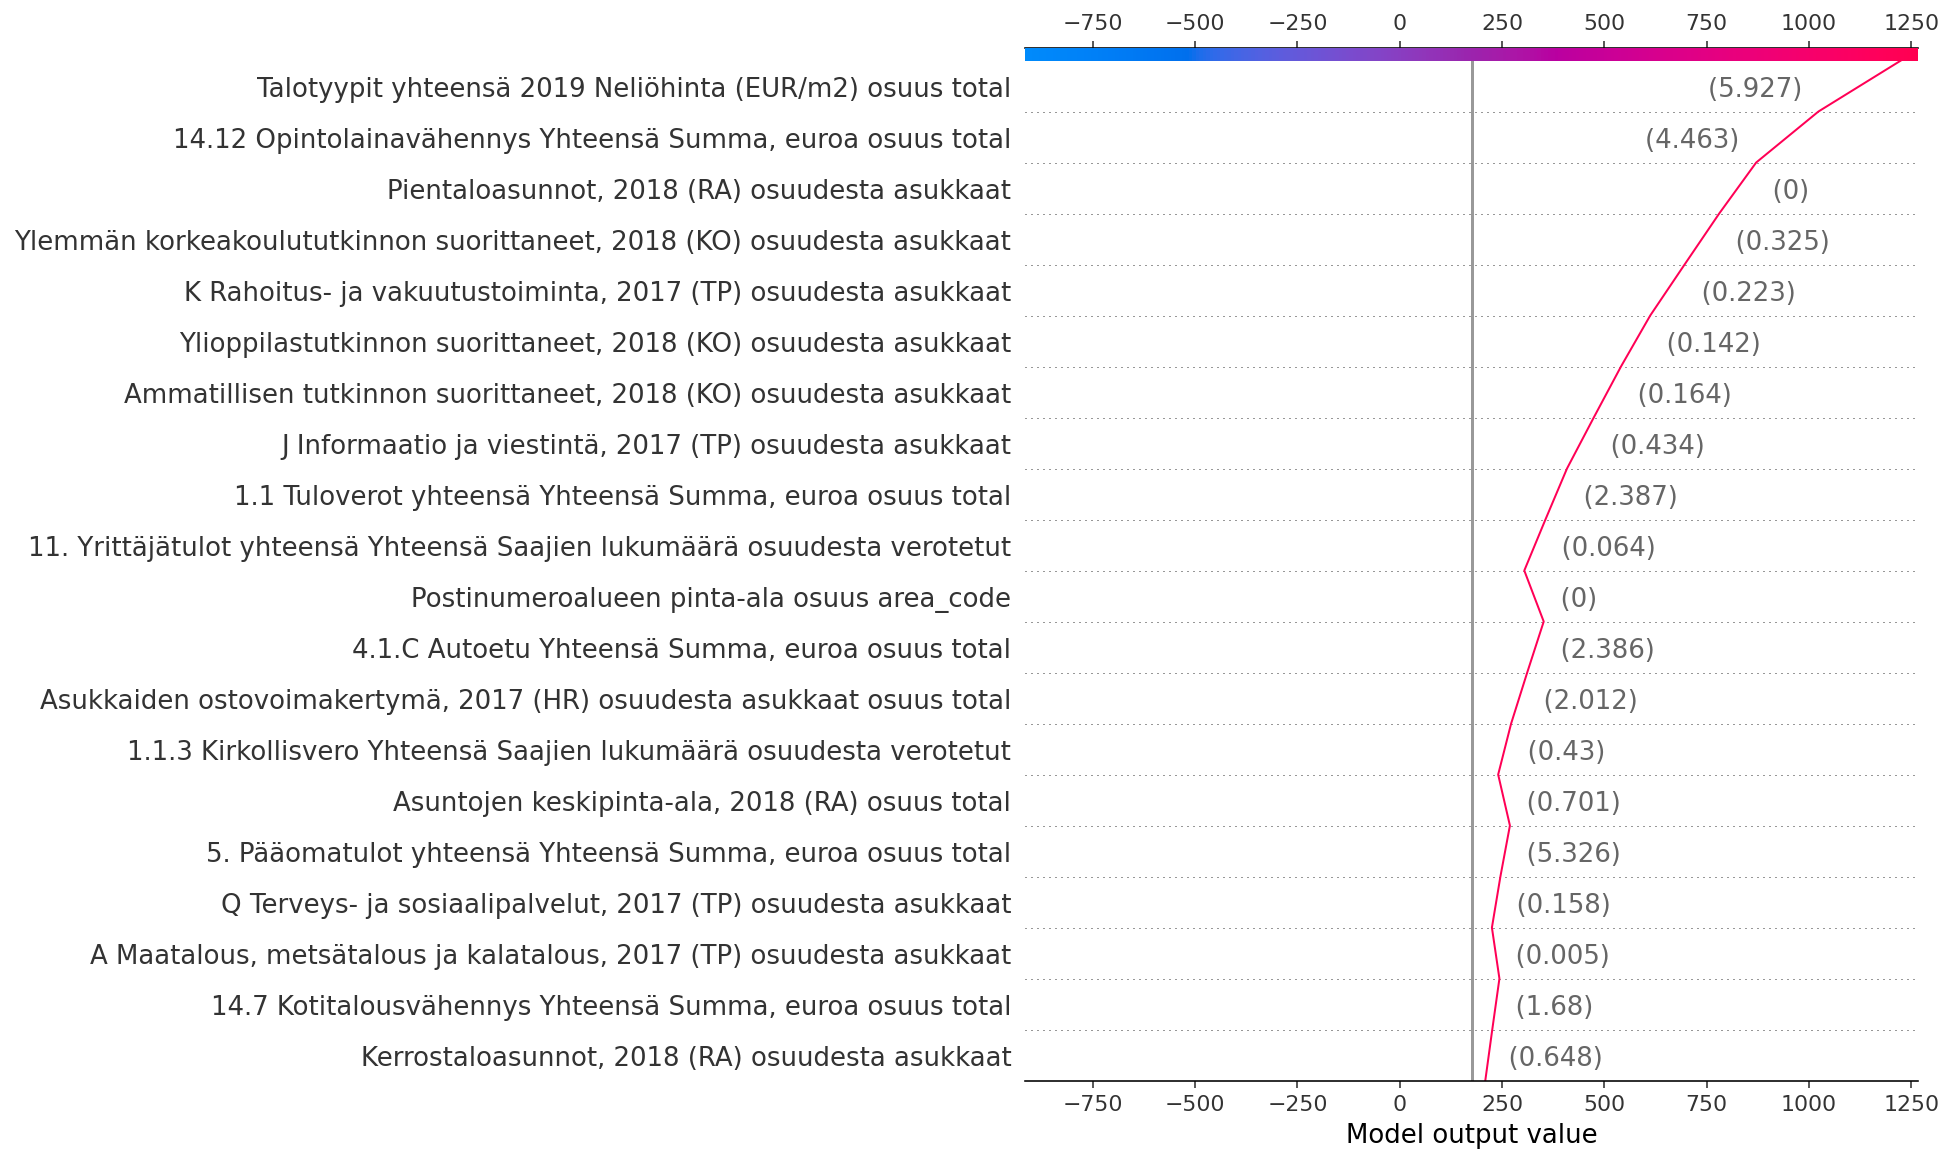

In [33]:
pnro = '02160'
id_col = 'Postinumero'
party ='KOK'
target = 'Äänet yhteensä lkm ' + party

idx = data[data[id_col]==pnro].index.item()

shap.decision_plot(shap_expected_value[target], shap_values[target][idx], X)

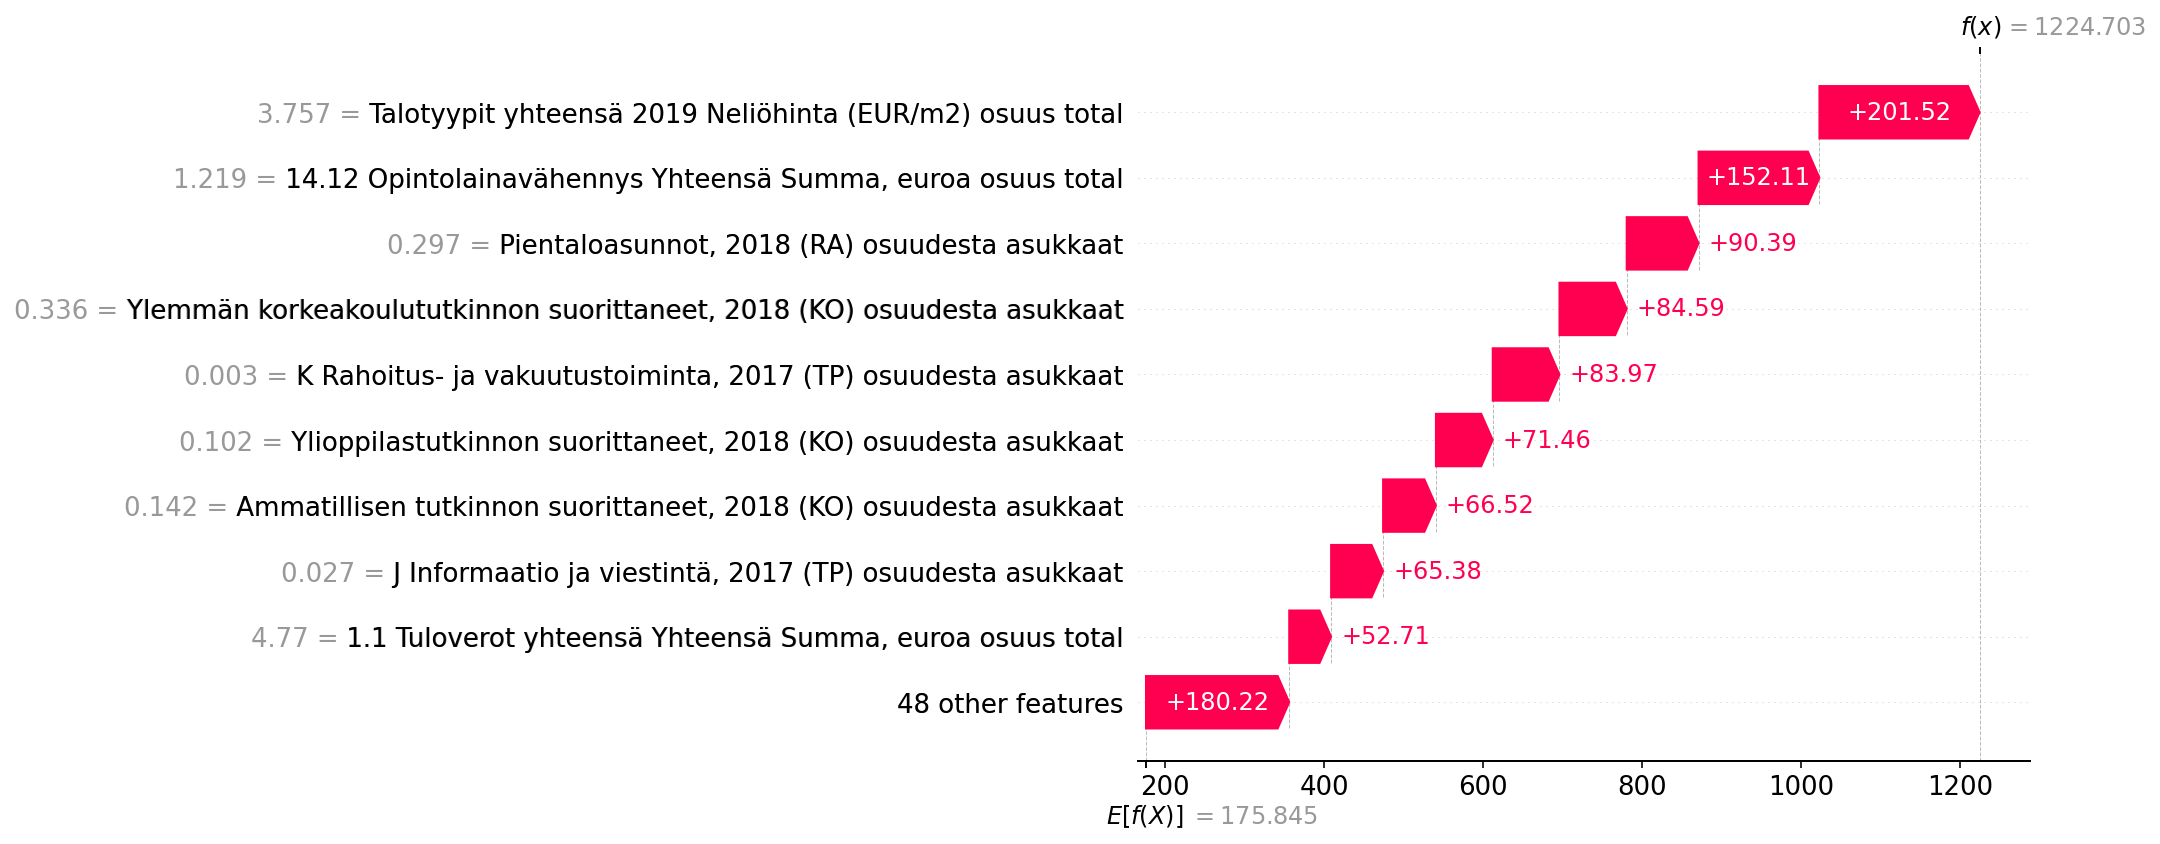

In [41]:
pnro = '02160'
id_col = 'Postinumero'
party ='KOK'
target = 'Äänet yhteensä lkm ' + party

idx = data[data[id_col]==pnro].index.item()
shap.waterfall_plot(shap_expected_value[target], shap_values[target][idx], X.iloc[idx,:])


In [42]:
data[data[id_col]==pnro]['Äänet yhteensä lkm KOK']

140    1223.0
Name: Äänet yhteensä lkm KOK, dtype: float64

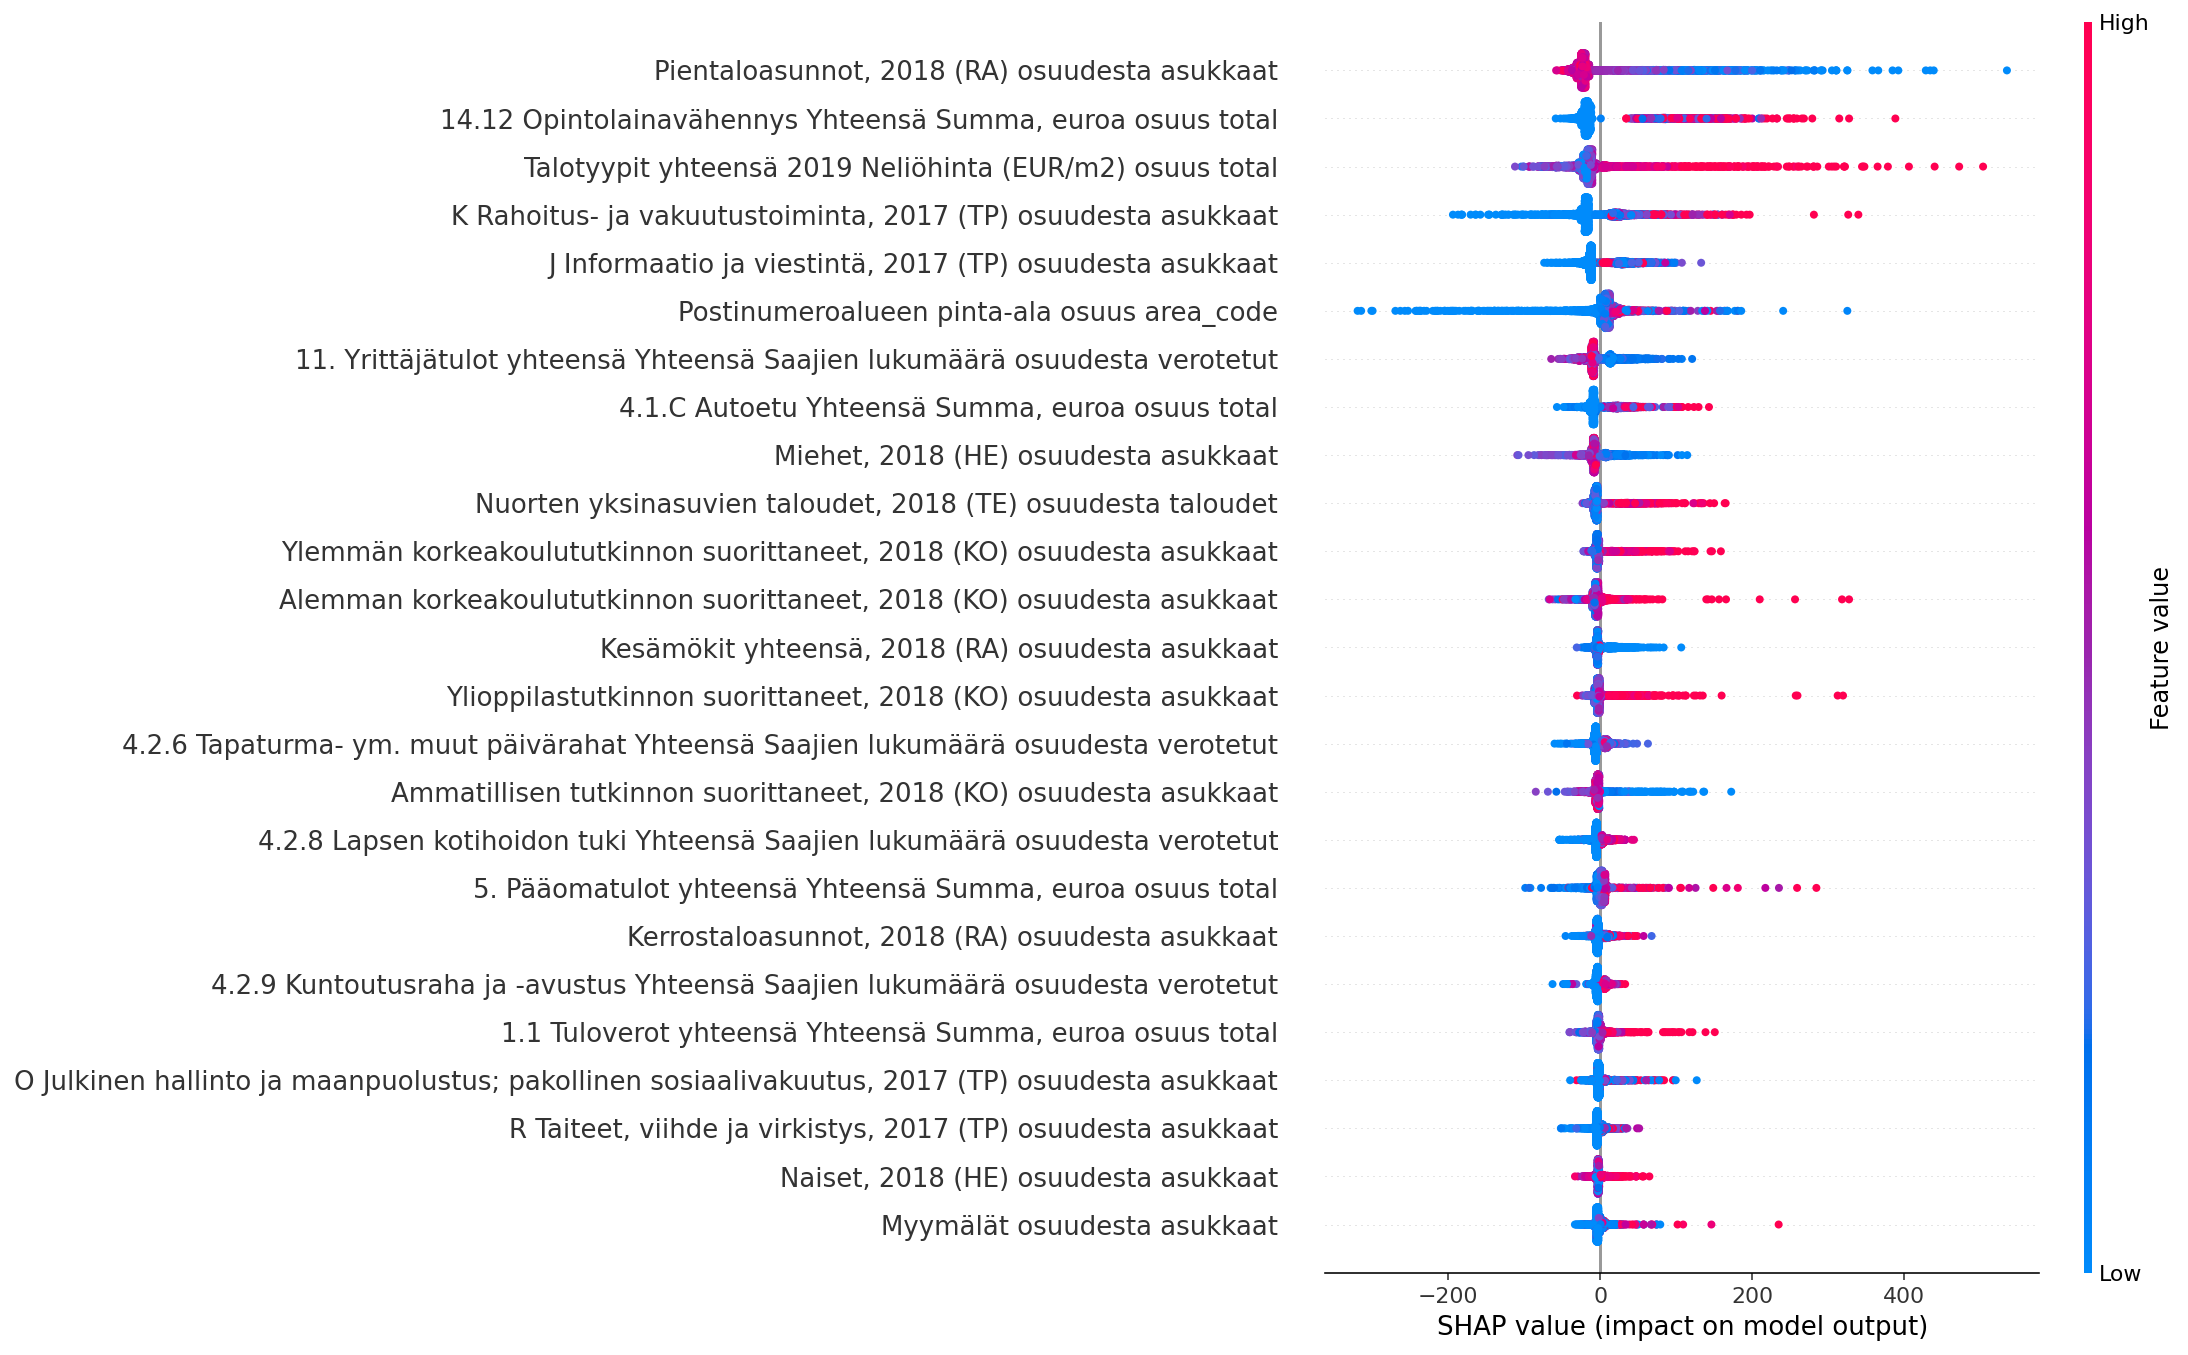

In [34]:
shap.summary_plot(shap_values[target], X,  max_display=25)

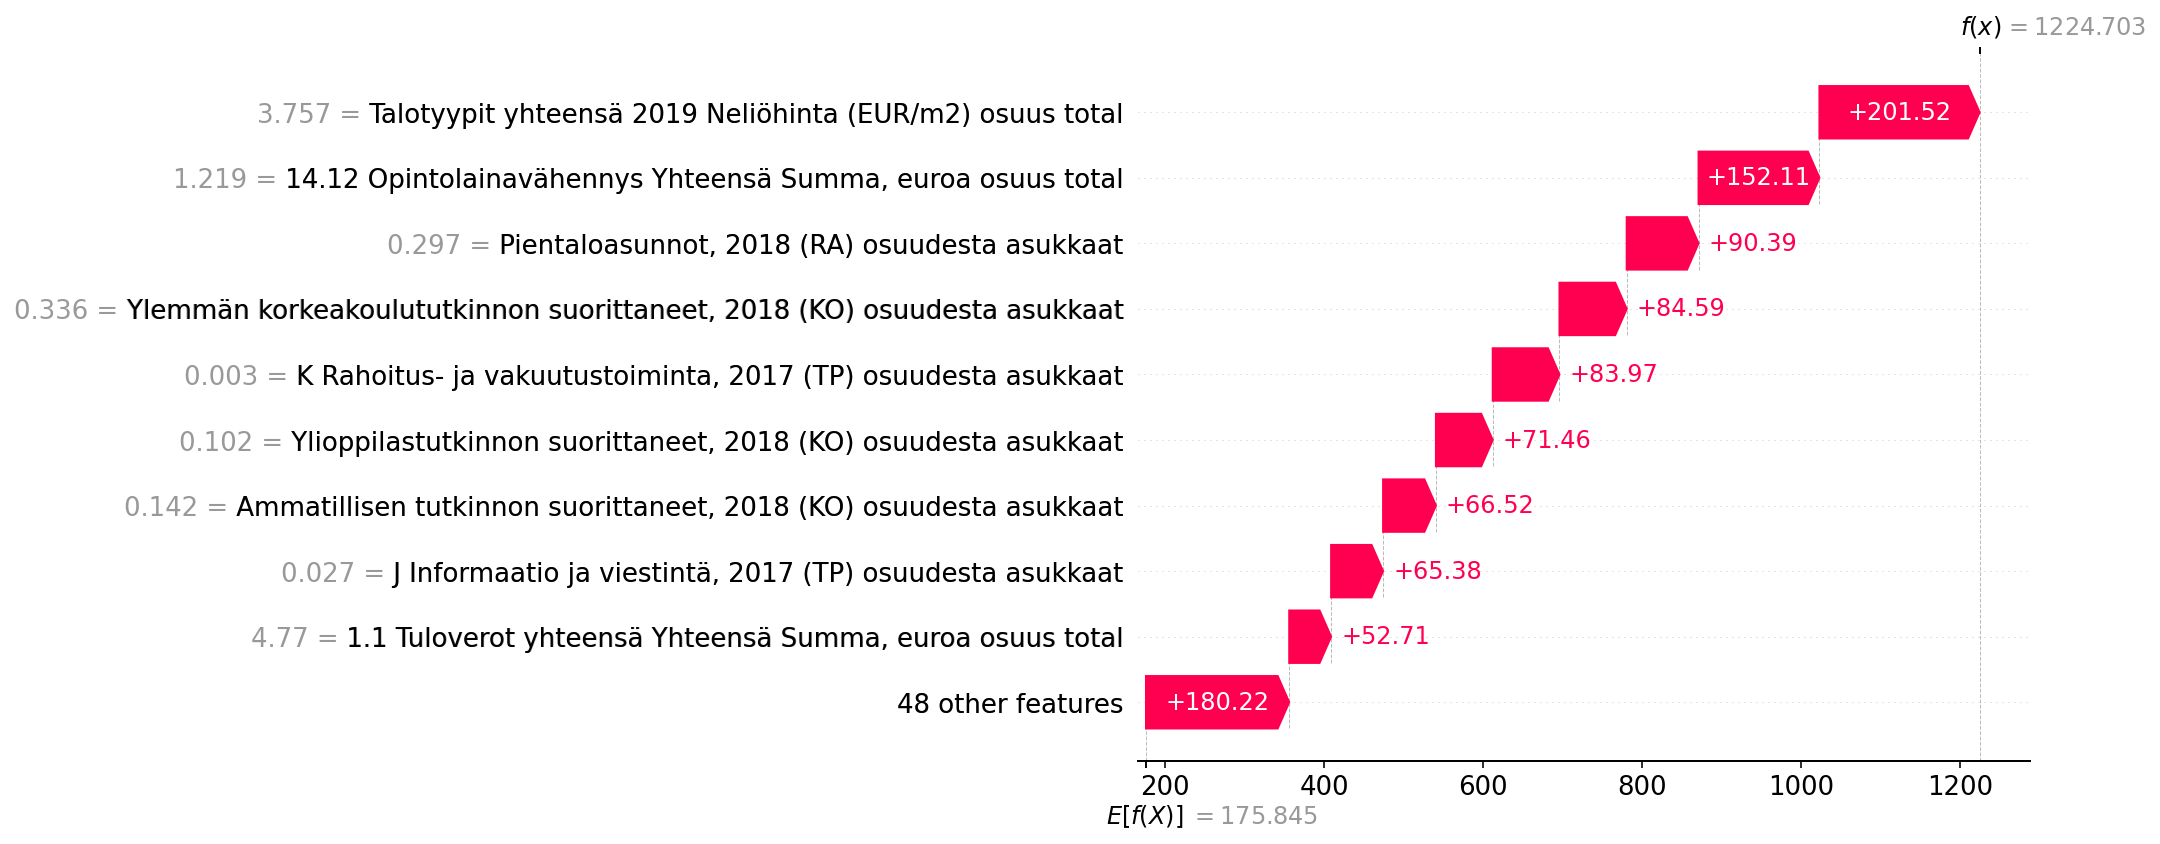

In [36]:
idx = data[data[id_col]==pnro].index.item()
shap.waterfall_plot(shap_expected_value[target], shap_values[target][idx], X.iloc[idx,:])

In [23]:
pnro = '00520'
id_col = 'Postinumero'

AttributeError: 'dict' object has no attribute 'shap_values'

In [38]:
idx = data[data['Postinumero']==pnro].index.item()
X_rand = X[X.index==idx].copy()
print_reason(X_rand, explainer[target], shap_values[target], mymodel[target], target)

AttributeError: 'XGBRegressor' object has no attribute 'predict_proba'

In [28]:
X.iloc[140]

Miehet, 2018 (HE) osuudesta asukkaat                                                                             -0.680852
Naiset, 2018 (HE) osuudesta asukkaat                                                                              0.709016
Asuntojen keskipinta-ala, 2018 (RA) osuus total                                                                   1.948123
Talotyypit yhteensä 2019 Neliöhinta (EUR/m2) osuus total                                                          3.553608
Asumisväljyys, 2018 (TE) osuus total                                                                              0.711744
Asukkaiden keski-ikä, 2018 (HE) osuus total                                                                      -0.424720
Postinumeroalueen pinta-ala osuus area_code                                                                      -0.649904
Perusasteen suorittaneet, 2018 (KO) osuudesta asukkaat                                                           -1.849481
Ammatillisen tut